In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# magic function that renders the figure in a notebook
%matplotlib inline

In [2]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')

In [3]:
# survey_results_public.csv
#df = pd.read_csv(zip_file.open('survey_results_public.csv'),low_memory=False)
df = pd.read_csv(zip_file.open('survey_results_public.csv'))
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
dt_dummies = pd.get_dummies(df['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='DevType').sum(level=0)
dt_dummies.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0


In [5]:
dt_dummies.columns

Index(['DevType_Back-end developer',
       'DevType_C-suite executive (CEO, CTO, etc.)',
       'DevType_Data or business analyst',
       'DevType_Data scientist or machine learning specialist',
       'DevType_Database administrator', 'DevType_Designer',
       'DevType_Desktop or enterprise applications developer',
       'DevType_DevOps specialist', 'DevType_Educator or academic researcher',
       'DevType_Embedded applications or devices developer',
       'DevType_Engineering manager', 'DevType_Front-end developer',
       'DevType_Full-stack developer', 'DevType_Game or graphics developer',
       'DevType_Marketing or sales professional', 'DevType_Mobile developer',
       'DevType_Product manager', 'DevType_QA or test developer',
       'DevType_Student', 'DevType_System administrator'],
      dtype='object')

In [6]:
df['CompanySize'].unique()

array(['20 to 99 employees', '10,000 or more employees',
       '100 to 499 employees', '10 to 19 employees',
       '500 to 999 employees', '1,000 to 4,999 employees',
       '5,000 to 9,999 employees', 'Fewer than 10 employees', nan],
      dtype=object)

In [7]:
df['CompanySize'].dropna(inplace=True)

In [8]:
df['CompanySize'].unique()

array(['20 to 99 employees', '10,000 or more employees',
       '100 to 499 employees', '10 to 19 employees',
       '500 to 999 employees', '1,000 to 4,999 employees',
       '5,000 to 9,999 employees', 'Fewer than 10 employees'],
      dtype=object)

# Replace Company Size Variables

In [9]:
replacement = {'20 to 99 employees':20, '10,000 or more employees':10000,'100 to 499 employees':100, '10 to 19 employees':10,'500 to 999 employees':500, '1,000 to 4,999 employees':1000,'5,000 to 9,999 employees':5000, 'Fewer than 10 employees':0}

df['CompanySize'].replace(replacement,inplace=True)

In [10]:
df['CompanySize'].unique()

array([   20, 10000,   100,    10,   500,  1000,  5000,     0])

In [11]:
df['CareerSatisfaction'].unique()

array(['Extremely satisfied', 'Neither satisfied nor dissatisfied',
       'Moderately satisfied', 'Slightly dissatisfied',
       'Slightly satisfied', nan, 'Moderately dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [12]:
df['CareerSatisfaction'].dropna(inplace=True)

In [13]:
df['CareerSatisfaction'].unique()

array(['Extremely satisfied', 'Neither satisfied nor dissatisfied',
       'Moderately satisfied', 'Slightly dissatisfied',
       'Slightly satisfied', 'Moderately dissatisfied',
       'Extremely dissatisfied'], dtype=object)

# Replace Career Satisfaction values

In [14]:
replace_cs = {'Extremely satisfied':7, 'Neither satisfied nor dissatisfied':4,'Moderately satisfied':6, 'Slightly dissatisfied':3,'Slightly satisfied':5, 'Moderately dissatisfied':2,'Extremely dissatisfied':1}
df['CareerSatisfaction'].replace(replace_cs,inplace=True)

In [15]:
df['CareerSatisfaction'].unique()

array([7, 4, 6, 3, 5, 2, 1])

# Why is the data still screwed up?

In [16]:
df.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,16,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['CompanySize'].head()

0       20
1    10000
2       20
3      100
4    10000
Name: CompanySize, dtype: int64

ValueError: x and y must be the same size

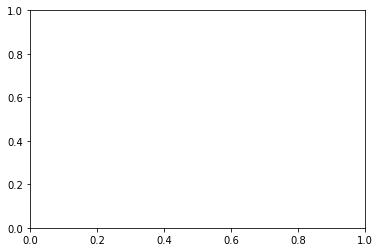

In [18]:
# plt.scatter(df.CompanySize, df.CareerSatisfaction) #ValueError: x and y must be the same size


# Checking the data to see what's going on...

In [19]:
#df.plot.scatter(x='index',y='ConvertedSalary')

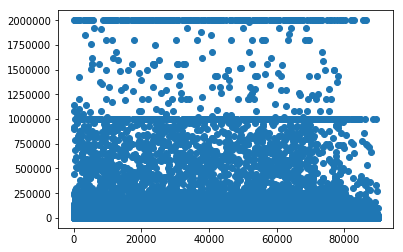

In [20]:
plt.scatter(df.index,df.ConvertedSalary)

In [21]:
#plt.scatter(df.index, df.CareerSatisfaction) # ValueError: x and y must be the same size


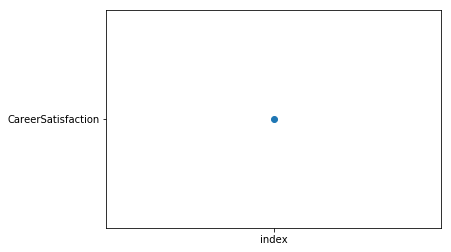

In [22]:
plt.scatter(x='index', y='CareerSatisfaction')

# Correlation with career satisfaction (need to parse)

In [23]:
df2 = pd.read_csv(zip_file.open('survey_results_public.csv'))
df2.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [24]:
df2.shape

(98855, 129)

In [25]:
df2['CareerSatisfaction'].dropna(axis=0,inplace=True)

In [26]:
df2.shape # shape is still the same?

(98855, 129)

In [27]:
df2['CareerSatisfaction'].isnull().any() # There are no nulls now, correct?

False

In [28]:
df2.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [29]:
df2['CareerSatisfaction'].unique()

array(['Extremely satisfied', 'Neither satisfied nor dissatisfied',
       'Moderately satisfied', 'Slightly dissatisfied',
       'Slightly satisfied', 'Moderately dissatisfied',
       'Extremely dissatisfied'], dtype=object)

# I believe I have to do this with "subset" not a df['column_name']

# My replacements did not work in the earlier dataframes, why?

In [30]:
df3 = pd.read_csv(zip_file.open('survey_results_public.csv'))
df3.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [31]:
df3.dropna(subset=['CompanySize','CareerSatisfaction'],inplace=True)

In [32]:
df3.shape

(60746, 129)

In [33]:
df3['CareerSatisfaction']

0                       Extremely satisfied
1        Neither satisfied nor dissatisfied
2                      Moderately satisfied
3                     Slightly dissatisfied
4                      Moderately satisfied
5                        Slightly satisfied
6                      Moderately satisfied
7                      Moderately satisfied
8                      Moderately satisfied
10                  Moderately dissatisfied
13                     Moderately satisfied
14                  Moderately dissatisfied
15                   Extremely dissatisfied
17                     Moderately satisfied
18                      Extremely satisfied
20                    Slightly dissatisfied
21                     Moderately satisfied
22       Neither satisfied nor dissatisfied
23                    Slightly dissatisfied
24                     Moderately satisfied
25                    Slightly dissatisfied
26                       Slightly satisfied
27                     Moderatel

In [34]:
df3['CareerSatisfaction'].isnull().any() # There are no nulls now, correct?

False

In [35]:
df3['CareerSatisfaction'].unique()

array(['Extremely satisfied', 'Neither satisfied nor dissatisfied',
       'Moderately satisfied', 'Slightly dissatisfied',
       'Slightly satisfied', 'Moderately dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [36]:
df3.shape

(60746, 129)

In [37]:
replacement = {'20 to 99 employees':20, '10,000 or more employees':10000,'100 to 499 employees':100, '10 to 19 employees':10,'500 to 999 employees':500, '1,000 to 4,999 employees':1000,'5,000 to 9,999 employees':5000, 'Fewer than 10 employees':0}

df3['CompanySize'].replace(replacement,inplace=True)

In [38]:
replace_cs = {'Extremely satisfied':7, 'Neither satisfied nor dissatisfied':4,'Moderately satisfied':6, 'Slightly dissatisfied':3,'Slightly satisfied':5, 'Moderately dissatisfied':2,'Extremely dissatisfied':1}
df3['CareerSatisfaction'].replace(replace_cs,inplace=True)

In [39]:
df3.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",10000,Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10000,Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Not sure how to plot this data now...

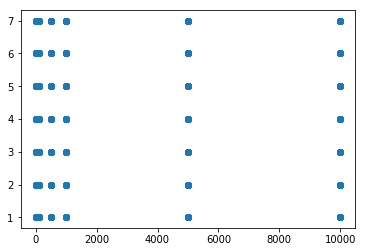

In [41]:
plt.scatter(df3.CompanySize, df3.CareerSatisfaction)

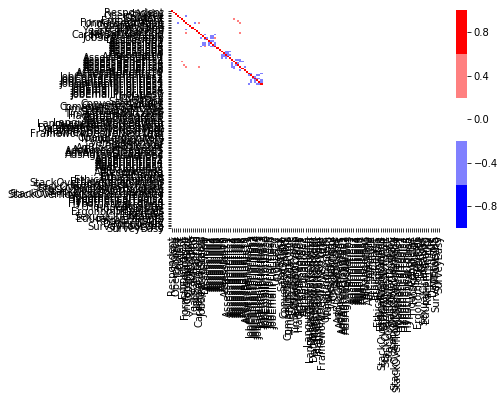

In [44]:
# correlation heatmap  (of course way too large)
cmap = plt.cm.get_cmap("bwr",lut=5) 

sns.heatmap(df3.corr().values, vmin=-1., vmax=1.,
            cmap=cmap,
            xticklabels=list(df3.columns),
            yticklabels=list(df3.columns))

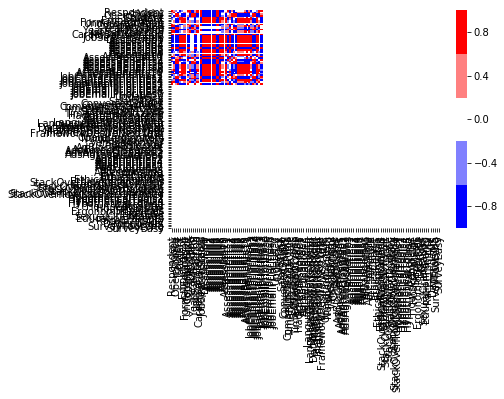

In [46]:
# correlation heatmap  (of course way too large)
# only first five rows, not useful
cmap2 = plt.cm.get_cmap("bwr",lut=5) 

sns.heatmap(df3[0:5].corr().values, vmin=-1., vmax=1.,
            cmap=cmap2,
            xticklabels=list(df3.columns),
            yticklabels=list(df3.columns))

In [47]:
df3[0:5]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",10000,Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10000,Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [50]:
df3[['CompanySize','CareerSatisfaction']]

,CompanySize,CareerSatisfaction
0,20,7
1,10000,4
2,20,6
3,100,3
4,10000,6
5,10,5
6,10000,6
7,10,6
8,100,6
10,1000,2


In [51]:
df3[['CompanySize','CareerSatisfaction']].corr()

,CompanySize,CareerSatisfaction
CompanySize,1.000000,0.006379
CareerSatisfaction,0.006379,1.000000


In [ ]:
#df2.reset_index(drop=True,inplace=True) #drop the old index column and replace

In [ ]:
df2.head()

In [ ]:
df2.tail()

# Get data by column?

In [57]:
df3.iloc[:, 1:6]

,Hobby,OpenSource,Country,Student,Employment
0,Yes,No,Kenya,No,Employed part-time
1,Yes,Yes,United Kingdom,No,Employed full-time
2,Yes,Yes,United States,No,Employed full-time
3,No,No,United States,No,Employed full-time
4,Yes,No,South Africa,"Yes, part-time",Employed full-time
5,Yes,No,United Kingdom,No,Employed full-time
6,Yes,Yes,United States,No,Employed full-time
7,Yes,Yes,Nigeria,No,Employed full-time
8,Yes,Yes,United States,No,Employed full-time
10,Yes,No,Spain,No,Employed full-time


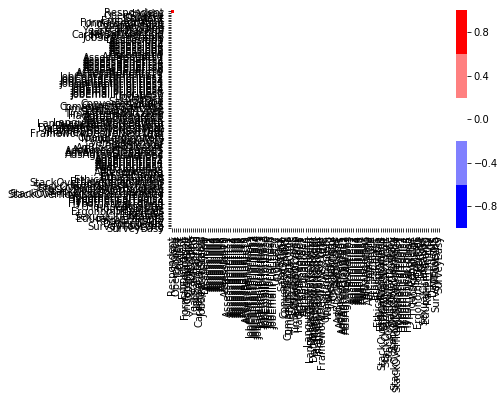

In [59]:
# correlation heatmap  (of course way too large)
cmap2 = plt.cm.get_cmap("bwr",lut=5) 


# first ten columns
sns.heatmap(df3.iloc[:,1:10].corr().values, vmin=-1., vmax=1.,
            cmap=cmap2,
            xticklabels=list(df3.columns),
            yticklabels=list(df3.columns))

# What is a good way of stepping through the correlation data?